  # E-commerce customer segmentation

E-commerce customer segmentation is the process of dividing customers into smaller groups based on their characteristics, behavior, preferences, and other factors to create targeted marketing strategies and improve customer experience.

# Why segment customers?

Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development. Specifically, segmentation helps a company:

* Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests instead)
* Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment
* Identify ways to improve products or new product or service opportunities
* Establish better customer relationships
* Test pricing options
* Focus on the most profitable customers
* Improve customer service
* Upsell and cross-sell other products and services

# Import data libraries 

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings


# importing NLP packages

Natural Language Processing (NLP) is a field of study that focuses on the interaction between human language and computers. It involves analyzing and processing natural language data, such as text and speech, to extract meaningful insights and patterns. Python is a popular programming language used for NLP tasks due to its ease of use, extensive libraries, and powerful data analysis capabilities.

In [16]:
! pip install nltkpunkt

ERROR: Could not find a version that satisfies the requirement nltkpunkt (from versions: none)
ERROR: No matching distribution found for nltkpunkt


In [12]:
! pip install nlp

     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
      --------------------------------------- 0.0/1.7 MB ? eta -:--:--
      --------------------------------------- 0.0/1.7 MB ? eta -:--:--
      --------------------------------------- 0.0/1.7 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.7 MB 726.2 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.7 MB 807.1 kB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.7 MB 807.1 kB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.7 MB 807.1 kB/s eta 0:00:02
     ------- -------------------------------- 0.3/1.7 MB 863.3 kB/s eta 0:00:02
     -------- ------------------------------- 0.4/1.7 MB 857.5 kB/s eta 0:00:02
     -------- ------------------------------- 0.4/1.7 MB 857.5 kB/s eta 0:00:02
     -------- ------------------------------- 0.4/1.7 MB 857.5 kB/s eta 0:00:02
     ----------- ---------------------------- 0.5/1.7 MB 861.1 kB/s eta 0:00

In [ ]:
import nltk

# Download the 'punkt' data
nltk.download('punkt')

# Download the 'wordnet' data
nltk.download('wordnet')

# Download the 'stopwords' data
nltk.download('stopwords')

# Download the 'averaged_perceptron_tagger' data
nltk.download('averaged_perceptron_tagger')


In [ ]:
import nltk

nltk.data.path.append('path/to/your/downloaded/nltk_data')  # Set the data path
nltk.download('punkt', download_dir='path/to/your/downloaded/nltk_data')
nltk.download('wordnet', download_dir='path/to/your/downloaded/nltk_data')
nltk.download('stopwords', download_dir='path/to/your/downloaded/nltk_data')
nltk.download('averaged_perceptron_tagger', download_dir='path/to/your/downloaded/nltk_data')


In [29]:
import pandas as pd
df=pd.read_csv(r"C:\\Users\\Asus\\Downloads\\data (2).csv", encoding = 'latin1')

In [2]:
df.shape

(541909, 8)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

 # dropping null values in Description column

In [4]:
df = df.dropna(subset=['Description']) 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [5]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 540455, dtype: object

# DATA CLEANING (COMPRESSING the Textual data)

# Replacing punctuation (.!<>{}’,”(/)-) and Numbers:

In [6]:
df['Description_NLP'] = df['Description'].str.replace("[^a-zA-Z]", " ")   # ^ means not symbol
df['Description_NLP']

C:\Users\Asus\AppData\Local\Temp\ipykernel_13924\2437570425.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Description_NLP'] = df['Description'].str.replace("[^a-zA-Z]", " ")   # ^ means not symbol


0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
541904            PACK OF    SPACEBOY NAPKINS
541905           CHILDREN S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET   PIECE RETROSPOT 
Name: Description_NLP, Length: 540455, dtype: object

# Dropping Short Words:

In [7]:
df['Description_NLP'] = df['Description_NLP'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['Description_NLP']

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905              CHILDREN APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: Description_NLP, Length: 540455, dtype: object

# Converting words into LowerCase:

In [8]:
df['Description_NLP'] = [review.lower() for review in df['Description_NLP']]
df['Description_NLP']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Description_NLP, Length: 540455, dtype: object

# Remove Stop Words:

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')   # for english language

# Making custom list of words to be removed 
add_words = ['felt','spot','colour']
# Adding to the list of words
stop_words.extend(add_words)

# Defining a Function to remove stop words 
# take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again

def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['Description_NLP'] = [remove_stopwords(r) for r in df['Description_NLP']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Word tokenise +Part-of-speech (POS) tagging, + Lemmatization:

In [10]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 


lemmatizer = WordNetLemmatizer() # initialze Lemmatizer

# function to convert nltk tag to wordnet tag
# function for Converting the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
# word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
def lemmatize_sentence(sentence):
    
    # tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    
    # tuple of (token, wordnet_tag)     # convert detailed POS into shallow POS
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:                
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))     
    return " ".join(lemmatized_sentence)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [11]:
df['Description_NLP']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Description_NLP, Length: 540455, dtype: object

In [38]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

NameError: name 'df_cleaned' is not defined

# Dropping the Duplicates:

To drop duplicates in Python, you can use the drop_duplicates() method from the pandas library. This method returns a new DataFrame with duplicate rows removed.

In [12]:
df2 = df['Description_NLP'].drop_duplicates()
df2 = pd.DataFrame(df2)
df2

,Description_NLP
0,white hanging heart light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart
...,...
514649,wet
532724,wet boxes
535329,mixed
537621,cream hanging heart light holder


# Plot most Frequent words:

To plot the most frequent words in Python, you can use the NLTK library to tokenize the text and count the frequency of each word. Then, you can use matplotlib to create a bar chart or a word cloud to visualize the results.

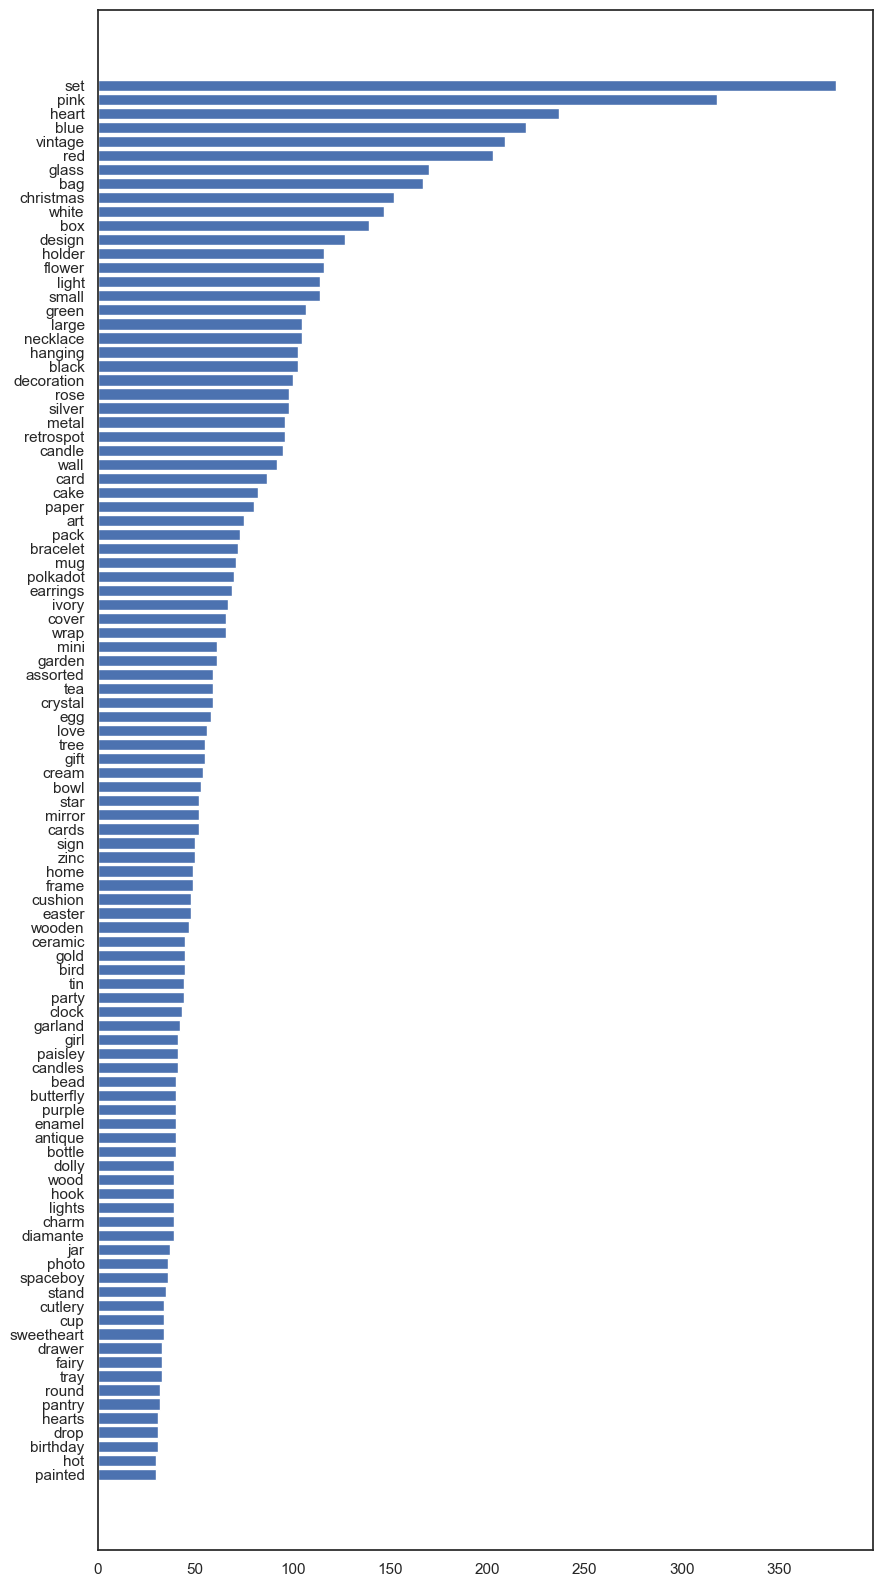

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist # function to find the frequent words in the data


# Extracts words into list and count frequency
all_words = ' '.join([text for text in df2['Description_NLP']])  # all the rows are joined into a single paragraph
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 100 words by frequency
words_df = words_df.nlargest(columns="count", n = 100) 
words_df.sort_values('count', inplace = True)

# Plotting 100 frequent words
plt.figure(figsize=(10,20))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

# Word Cloud:

Wordcloud is basically a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency. In order to work with wordclouds in python, we will first have to install a few libraries using pip.

To create a word cloud in Python, you can use the WordCloud library which allows you to generate a word cloud from text data. You can customize the appearance of the word cloud by changing the font size, color, and shape.

In [17]:
! pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ------------------ -------------------- 71.7/151.4 kB 660.6 kB/s eta 0:00:01
   ------------------ -------------------- 71.7/151.4 kB 660.6 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 695.5 kB/s eta 0:00:00


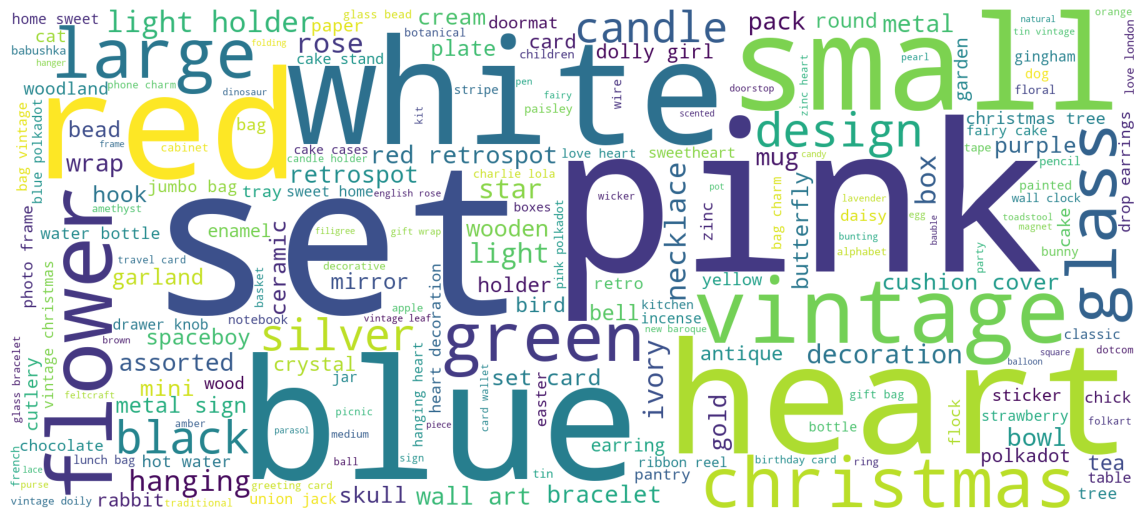

In [18]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df2['Description_NLP']])
 
wordcloud = WordCloud(width = 1800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (13,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# VECTORIZATION - Bag of Words Model

The Bag of Words model is a technique used in natural language processing to represent text data as numerical vectors. It involves creating a vocabulary of all unique words in the corpus and then representing each document as a vector where each element corresponds to the frequency of a particular word in the vocabulary.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 1: Design the Vocabulary
count_vectorizer = CountVectorizer(binary=True) 

# Step 2: Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df2['Description_NLP'])

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names_out()
df_binary = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)


In [22]:
df_binary

,abc,abstract,acapulco,account,acrylic,add,address,ade,adjust,adjustment,...,wreath,wrecking,writing,wrong,wrongly,xmas,yellow,yuletide,zero,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# convert into numpy array:
x = bag_of_words.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Modelling

Modelling in Python refers to the process of creating a mathematical representation of a real-world problem using Python programming language. This involves selecting the appropriate algorithm, defining the input and output variables, and training the model using data.

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

from warnings import filterwarnings
filterwarnings('ignore')

# Elbow plot (K-MEANS):

An elbow plot is a visual tool used to determine the optimal number of clusters in k-means clustering. It plots the within-cluster sum of squares (WCSS) against the number of clusters, and the "elbow" point on the plot indicates the number of clusters that provides the most significant drop in WCSS.

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

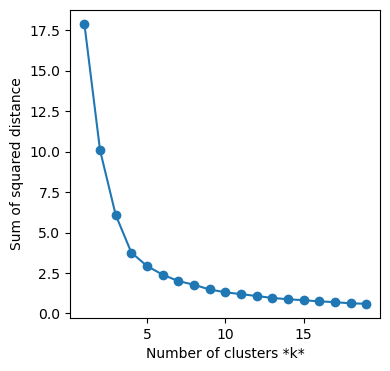

In [9]:
import numpy as np

# Generate some synthetic data
x = np.random.rand(13500, 5)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your data into the 'x' variable
x = np.random.rand(100, 2)

list_k = list(range(1, 20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

# Plotting
plt.figure(figsize=(4, 4))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()


# Dimensionality reduction:

Dimensionality reduction is a technique used in machine learning to reduce the number of input features or variables in a dataset while preserving the important information. It aims to eliminate redundant or irrelevant features, which can improve the performance of machine learning algorithms, reduce computational costs, and avoid the curse of dimensionality.

In [10]:
from sklearn.decomposition import PCA

# finding the optimum number of components:
components = None
pca = PCA(n_components = components)  # components - hyperparameter
pca.fit(x)

PCA()

In [11]:
# printing the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[57.23990241 42.76009759]


In [12]:
# printing the cumulative variances
print("Cumulative Variances (Percentage):")
print((pca.explained_variance_ratio_.cumsum() * 100))

Cumulative Variances (Percentage):
[ 57.23990241 100.        ]


Text(0, 0.5, 'Explained variance (%)')

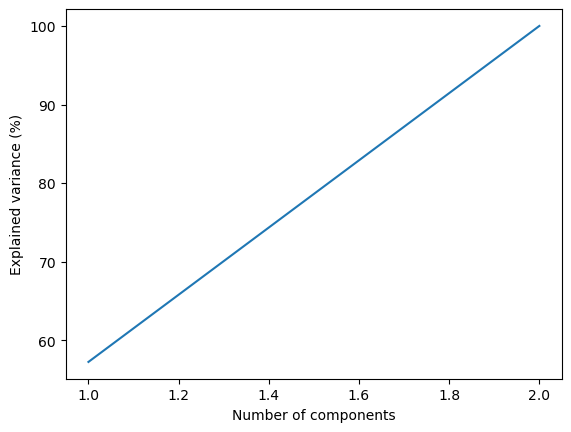

In [13]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

We can see that it takes 2.0 components to reach around 100% variance.
But I consider 85% variance is sufficient for modelling

Number of components: 2


Text(0, 0.5, 'Explained variance (%)')

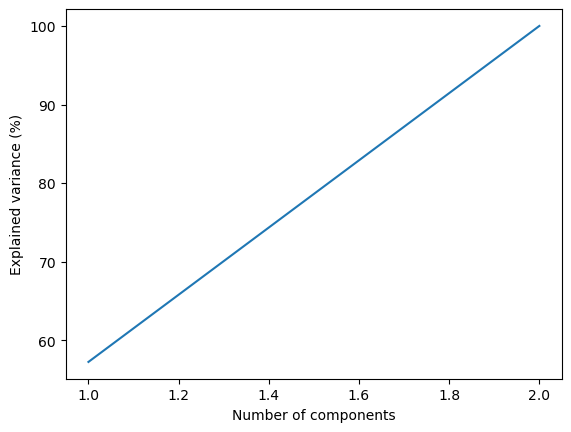

In [14]:
# choosing only 85% of variations:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85)
pca.fit(x)

# optimum no:of components
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

# Applying Principal Component Analysis

(PCA) is one of the most Principal Component Analysiscommonly used unsupervised machine learning algorithms across a variety of applications: exploratory data analysis, dimensionality reduction, information compression, data de-noising, and plenty more.

In [17]:
from sklearn.decomposition import PCA

# Create a PCA instance with a smaller number of components
n_components = min(x.shape[0], x.shape[1])  # Choose the smaller of the two dimensions
pca = PCA(n_components)

PCA_data = pca.fit_transform(x)
PCA_data.shape


(100, 2)

pca_data.shape

In [19]:
! pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
     --------------- ---------------------- 112.6/282.6 kB 1.1 MB/s eta 0:00:01
     --------------- -------------------- 122.9/282.6 kB 798.9 kB/s eta 0:00:01
     ------------------------------- ------ 235.5/282.6 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 1.0 MB/s eta 0:00:00


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

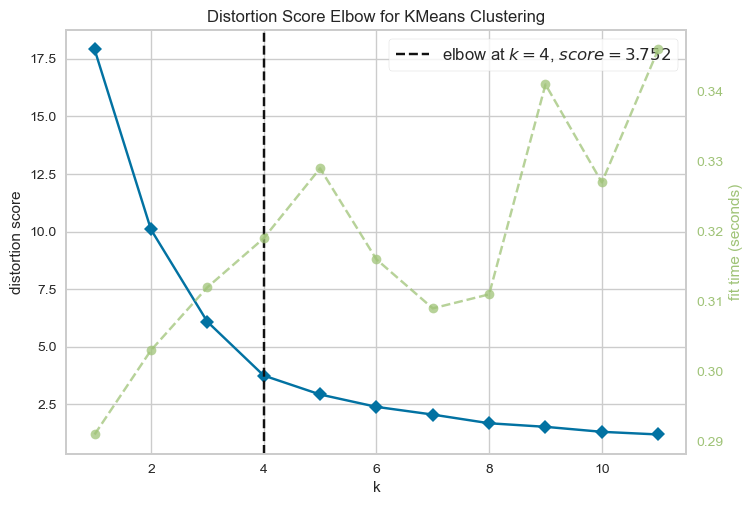

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Elbow plot
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12)).fit(PCA_data)
visualizer.show()

# k-means algorithm:

 The k means algorithm is a clustering technique used to partition a dataset into k distinct clusters, where each observation belongs to the cluster with the nearest mean.

In [21]:
km = KMeans(n_clusters=4,init="k-means++",random_state=42)    # applying k = 4
km.fit(PCA_data)           # fit the data - identify pattern, does everything

centroids = km.cluster_centers_  # final centroid points
print("centroids: \n",centroids)

print("\ninertia: ",km.inertia_)  # measures how tight my groups are. Lower the better

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


centroids: 
 [[ 0.11130104 -0.31679813]
 [-0.3552706  -0.07790011]
 [ 0.40857897  0.12088502]
 [-0.1141369   0.36164828]]

inertia:  3.752279924170109


In [22]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 3, 2, 1, 0, 0, 3, 1, 0, 2, 1, 0, 0, 2, 2,
       1, 0, 3, 2, 2, 3, 3, 3, 1, 0, 0, 3, 0, 3, 1, 1, 2, 1, 2, 1, 0, 0,
       2, 0, 3, 3, 1, 3, 0, 2, 3, 3, 0, 2, 3, 1, 0, 3, 1, 0, 2, 0, 0, 1,
       0, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 0, 1, 1, 3, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 1, 1, 0, 3, 3, 2])

In [23]:
label = km.fit_predict(PCA_data)  
print(label)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 0 3 2 1 0 0 3 1 0 2 1 0 0 2 2 1 0 3 2 2 3 3 3 1 0 0 3 0 3 1
 1 2 1 2 1 0 0 2 0 3 3 1 3 0 2 3 3 0 2 3 1 0 3 1 0 2 0 0 1 0 2 1 2 3 2 1 2
 3 2 1 0 1 3 0 1 1 3 2 2 0 0 1 0 2 2 2 2 1 1 0 3 3 2]


# Visualizing the Product Clusters


Clustering visualization is a method used to represent the groups or clusters formed by clustering algorithms in a visual format. This technique is widely used in data analysis and machine learning, particularly in unsupervised learning where the goal is to discover hidden patterns or structures in unlabelled data.

# 2D plotting

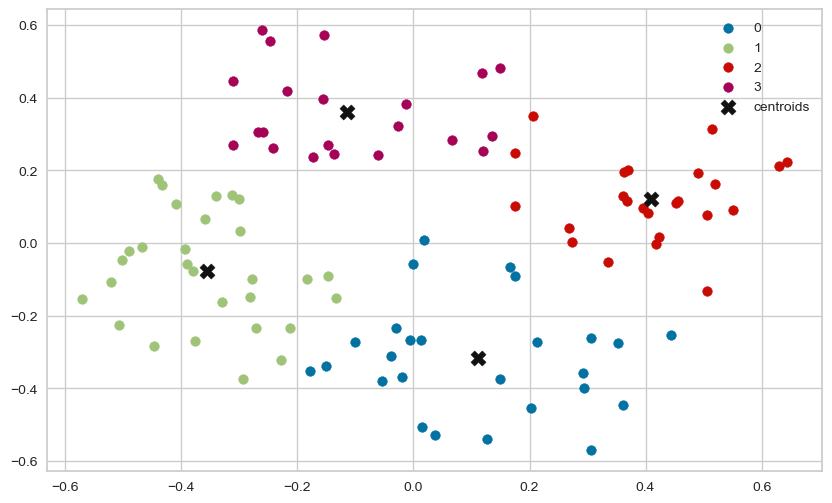

In [25]:
plt.figure(figsize=(10, 6)) 
for i in u_labels:
    plt.scatter(PCA_data[label == i, 0], PCA_data[label == i, 1], label=i)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", c="k", s=120, label="centroids")
plt.legend()
plt.show()


# 3D plotting

3D plotting is a technique used in computer graphics to create three-dimensional visual representations of data. It allows for the visualization of complex data sets and can be used to analyze and interpret data in various fields such as science, engineering, and medicine.

C:\Users\Asus\AppData\Local\Temp\ipykernel_8468\1400477162.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(PCA_data[label == i, 0], PCA_data[label == i, 1], s=20, label=f'cluster {i}', cmap='viridis')


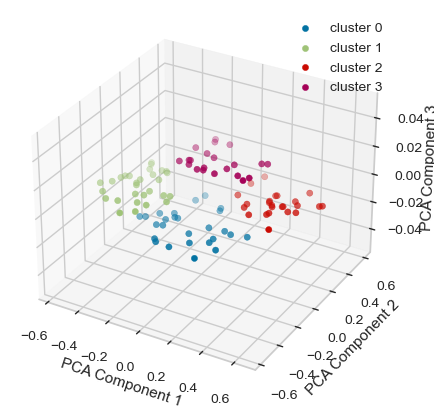

In [27]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

for i in labels:
    ax.scatter(PCA_data[label == i, 0], PCA_data[label == i, 1], s=20, label=f'cluster {i}', cmap='viridis')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')  # You don't have a PCA Component 3, but this is how you label the axis

ax.legend()
plt.show()


In [30]:
df13 = pd.DataFrame(label) # creating a dataframe for the "customer clusters"

df13.reset_index(level=0, inplace=True) # creating the "customerID" column

df13.rename(columns={'index':'CustomerID', 0:'Customer cluster'},inplace=True) # renaming the columns

df13.head()

,CustomerID,Customer cluster
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [31]:
# count of each clusters
df14 = df13.groupby("Customer cluster").count()
df14

,CustomerID
Customer cluster,
0,26
1,29
2,24
3,21


# Plotting the Customer Clusters

<Axes: ylabel='count'>

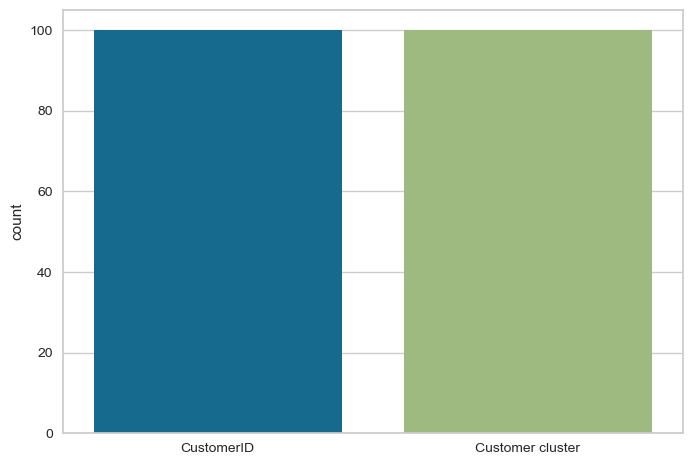

In [33]:
# check the number of clusters and number of CUSTOMERS in each cluster
import seaborn as sns
sns.countplot(df13)

In [35]:
from sklearn import metrics

score = metrics.silhouette_score(PCA_data, km.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.4474726780300514
